##This notebook trains a 4-group classifier model

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Aug 10 18:01:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.1 MB/s eta 0:00:00
Mounted at /content/gdrive


In [4]:
from fastbook import *
from fastai.vision.widgets import *

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/MyDrive/DL_images/temp_vs_trop/model_dev/'

In [7]:
fns = get_image_files(path)
fns

(#3438) [Path('/content/drive/MyDrive/DL_images/temp_vs_trop/model_dev/temperate_diploid/incisa_2c824e11-d671-4d20-9866-4075a17da38f.jpg'),Path('/content/drive/MyDrive/DL_images/temp_vs_trop/model_dev/temperate_diploid/incisa_2e679854-ed76-47ad-9b8b-c03592b66493.jpg'),Path('/content/drive/MyDrive/DL_images/temp_vs_trop/model_dev/temperate_diploid/incisa_37c05c5f-4da2-47e5-983c-7cd1d8fed2a0.jpg'),Path('/content/drive/MyDrive/DL_images/temp_vs_trop/model_dev/temperate_diploid/incisa_3d1239ea-2640-47d1-a4e6-2f03659559a5.jpg'),Path('/content/drive/MyDrive/DL_images/temp_vs_trop/model_dev/temperate_diploid/incisa_4004d60e-16d6-4f84-b7ed-b9f88c566743.jpg'),Path('/content/drive/MyDrive/DL_images/temp_vs_trop/model_dev/temperate_diploid/incisa_433b09f4-e897-476f-9d6f-59429fca65f5.jpg'),Path('/content/drive/MyDrive/DL_images/temp_vs_trop/model_dev/temperate_diploid/incisa_44b2f66e-e5c4-49db-9805-63810255cb04.jpg'),Path('/content/drive/MyDrive/DL_images/temp_vs_trop/model_dev/temperate_diploid/i

In [ ]:
failed = verify_images(fns)
print(failed)

In [8]:
pilot_tt = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [9]:
dls = pilot_tt.dataloaders(path)

In [10]:
pilot_tt = pilot_tt.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())


dls = pilot_tt.dataloaders(path)

In [11]:
learn2 = vision_learner(dls, resnet50, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 90.1MB/s]


In [12]:
from fastai.callback.fp16 import *

In [13]:
learn2 = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn2.fine_tune(24, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,1.364940,0.866329,0.248908,11:56
1,1.035152,0.799843,0.216885,06:37
2,0.844478,0.616060,0.186317,06:38


epoch,train_loss,valid_loss,error_rate,time
0,0.485474,0.474171,0.155750,06:43
1,0.424644,0.383325,0.135371,06:37
2,0.376153,0.414822,0.135371,06:43
3,0.337825,0.540512,0.147016,06:38
4,0.280476,0.538906,0.163028,06:32
5,0.260603,0.386873,0.114993,06:49
6,0.234008,0.378634,0.119360,06:58
7,0.214605,0.523513,0.129549,06:47
8,0.191120,0.358944,0.112082,06:40
9,0.163384,0.401697,0.120815,06:42


In [14]:
learn2.export('prunus_res50_temp_trop_v4_fp16_24epochs.pkl')

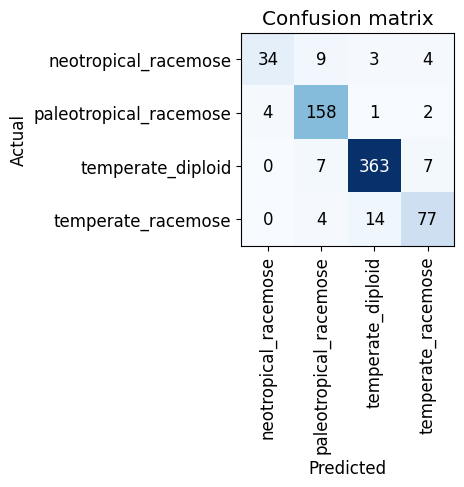

In [15]:
interp2 = ClassificationInterpretation.from_learner(learn2)
interp2.plot_confusion_matrix()